# COGS 108 - Final Project 

# Overview

In this project, I am analyzing the difference between income and the avg. violations in a given zip code. In order to analyize the significance of the statistics I am creating, I use the p-value to decide whether the findings are correlated. This will decide if my hypotehsis is correct. I found that despite the per capita income of the areas, the scores were roughly the same.

# Name & GitHub

- Name: Gilbert Nguyen
- GitHub Username: melbss

# Research Question

Do some zipcodes/areas have more violations and do they consistently get more of the same violations than others?

## Background and Prior Work

From looking at the score sheets from the NC websites, I found out that they score it out of 100. Anything higher than 90 is good and they all correspond to a grade. The num_critical are the things are the restaurant has violated and is considered bad and deduct the score heavily. The violations count against the score the restaurant has received.

There have been people who've looked at the LA county health inspections. They found that there are inspections that check restaurants that have a presence of health code violations. Different violations are correlated to different levels of risk to the public's health and safety. They also created a list of restaurants that have the most inspections and checked risk levels. 

References (include links):
- 1) http://wake-nc.healthinspections.us/
- 2) https://www.bizjournals.com/triangle/news/2015/09/23/wake-county-restaurants-critical-health-code.html
- 3) https://towardsdatascience.com/visual-communication-4f674699cb69

# Hypothesis


I predict that some zipcodes/areas will have more violations than others and also those violations can happen to two or more different locations. This is because some areas could just be affected by the income in their area and thus higher income areas will have lower violation scores, and lower income areas will have higher violation scores.

# Dataset(s)

Dataset Name: df_inspections
- Link to the dataset: /data/inspections.csv
- Number of observations: 2
- Describe: This dataset has all the inspections of restaurants. It has a score for violations (num_critical), and the zip code of the places that have been inspected. They would be stored in a dataframe and used as a .csv. The variables I would have would be mostly int with some str. I would be mostly focusing on zip and num_critical.

Dataset Name: df_zipcodes
- Link to the dataset: /data/zipcodes.csv
- Number of observations: 2
- Describe: This dataset has a list of zip codes and per capita income. I would be focusing on those two because they will give me the dat a I need.

I plan on taking these datasets and matching them together through their zip and merging them with their number of violations at restaurants and the income of the area.

# Setup

In [1]:
## YOUR CODE HERE
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
# Note: the statsmodels import may print out a 'FutureWarning'. Thats fine.

# Data Cleaning

Data Cleaning Steps:
- I load in the dataset I need: 'inspections', 'violations', 'zipcodes'
- I check the integrity of the datasets, get rid of any NaN values because they would not be useful for what I'm searching for
- I convert any zipcode larger than 5 digits and trim it because anything longer is too specific.
- I store it back into the 'df_inspection' and sort it from lowest to highest.
- I create a new dataset called df_zip_mean to store the two different columns I need from inspections which are 'num_critical' and 'zip_code'
- I create another column called 'mean violations' so I can store the mean of all the violations in that zip code.
- I run a for loop to calculate the total 'num_critical' for a given zip code and also another loop for to calculate the number of zip codes and then calculate the mean and store it in 'mean violations'. I then take df_zipcodes and merge it with the matching zip codes in the df_zip_mean
- All the data I need is in 'df_zip_mean' to use as analysis

In [2]:
# Load in dataset in the format of csv using pandas read_csv method, store in respective variables
data_filepath_inspections = 'data/inspections.csv'
data_filepath_violations = 'data/violations.csv'
data_filepath_zipcodes = 'data/zipcodes.csv'

df_inspection = pd.read_csv(data_filepath_inspections)
df_violation = pd.read_csv(data_filepath_violations)
df_zipcodes = pd.read_csv(data_filepath_zipcodes)

In [3]:
# check the rows for inspection
df_inspection.head()

,hsisid,date,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,...,num_non_critical,num_critical_previous,num_non_critical_previous,num_critical_mean_previous,num_non_critical_mean_previous,avg_neighbor_num_critical,avg_neighbor_num_non_critical,top_match,second_match,critical
0,4092013748,2012-09-21T00:00:00Z,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,(919) 350-8047,2002-12-21T00:00:00Z,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,4092014046,2012-09-21T00:00:00Z,Overtime Sports Pub,1030-149 N Rogers Ln,NaN,raleigh,NC,27610,(919) 255-9556,2004-05-04T00:00:00Z,...,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,4092015191,2012-09-21T00:00:00Z,TASTE OF CHINA,6209 ROCK QUARRY RD,STE 126,raleigh,NC,27610,(919) 773-2285,2008-08-04T00:00:00Z,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4092016122,2012-09-21T00:00:00Z,Panera Bread #1643,1065 Darrington DR,NaN,cary,NC,27513,NaN,2012-03-28T00:00:00Z,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,4092021513,2012-09-21T00:00:00Z,WalMart Supercenter #4499-00 Deli/Bakery,841 E Gannon AVE,NaN,zebulon,NC,27597,(919) 269-2221 ext. 304,2008-02-25T00:00:00Z,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [4]:
# Inspecting information to understand the file for inspection
df_inspection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18466 entries, 0 to 18465
Data columns (total 36 columns):
hsisid                                   18466 non-null int64
date                                     18466 non-null object
name                                     18466 non-null object
address1                                 18466 non-null object
address2                                 1895 non-null object
city                                     18466 non-null object
state                                    18466 non-null object
postalcode                               18466 non-null object
phonenumber                              17965 non-null object
restaurantopendate                       18466 non-null object
days_from_open_date                      18466 non-null int64
facilitytype                             18466 non-null object
x                                        18466 non-null float64
y                                        18466 non-null float64
geocodesta

In [5]:
# checking for NaN values in inspection and adding it up
df_inspection.isna().sum()

hsisid                                       0
date                                         0
name                                         0
address1                                     0
address2                                 16571
city                                         0
state                                        0
postalcode                                   0
phonenumber                                501
restaurantopendate                           0
days_from_open_date                          0
facilitytype                                 0
x                                            0
y                                            0
geocodestatus                                0
zip                                          0
type                                         0
description                              10516
inspectedby                                  5
inspection_num                               0
inspector_id                                 5
previous_insp

In [6]:
# use only these necessary columns
df_inspection = df_inspection[['zip', 'score','num_critical']]

In [7]:
#inspect the stats
df_inspection.head()

,zip,score,num_critical
0,27610,96.0,9
1,27610,98.0,0
2,27610,97.0,4
3,27513,99.0,2
4,27597,97.0,2


In [9]:
df_inspection = df_inspection.sort_values(by = 'zip', ascending = True)
df_inspection = df_inspection.reset_index(drop= True)
df_zipcodes = df_zipcodes.sort_values(by = 'zip', ascending = True)
df_zipcodes = df_zipcodes.reset_index(drop= True)

df_zip_mean = pd.DataFrame(columns = ['Zip Codes','Violations','Amount Inspected', 'avg_violations', 'per_capita_income'])
df_zip_mean['Zip Codes'] = df_zipcodes['zip']
df_zip_mean = df_zip_mean.drop([37])

In [10]:
#loop to store the total num_criticals of a zip code
for i, item in df_zip_mean.iterrows():
    merge = 0
    count = 0
    for index, row in df_inspection.iterrows():
        if item['Zip Codes'] == row['zip']:
            merge = merge + df_inspection['num_critical'].iloc[index]
            count = count + 1
        df_zip_mean.at[i, 'Violations'] = merge
        df_zip_mean.at[i, 'Amount Inspected'] = count

In [11]:
#loop to store the count of the different zip codes to calcualte the avg for num_critical in a zipcode
for j, item2 in df_zip_mean.iterrows():
    for k, row2 in df_inspection.iterrows():
        if item2['Zip Codes'] == row2['zip']:
            df_zip_mean.at[j, 'avg_violations'] = df_zip_mean.at[j, 'Violations'] / df_zip_mean.at[j, 'Amount Inspected']
            df_zip_mean.at[j, 'per_capita_income'] = df_zipcodes.at[j, 'per_capita_income_dollars']

# Data Analysis & Results

## EDA
The table shown below shows all the zip codes of placed that have been inspected. __Violations__ is the total of all the violations in that specific zip code. The __avg_violations__ is the avg of violations per zip code. The __per_capita_income__ is the avg. income earned in those locations.

The __scope of the data__ helps answer the question I have stated above because I have info about the income of the zip codes, the amount of violations that were critical, and the avgerage of it.

The dataset doesn't have the __temproality information__ because it's not important for the analysis.

The __faithfulness of the data__ is unclear because we do not have specific information as to when/where the data came from.

In [12]:
df_zip_mean.head()

,Zip Codes,Violations,Amount Inspected,avg_violations,per_capita_income
0,27501,36,6,6,21631
1,27502,1959,659,2.97269,36763
2,27511,3897,1339,2.91038,33139
3,27513,3534,809,4.36836,41232
4,27518,662,344,1.92442,49865


We first look at the avg. per zip code. We see that __27501__ that has the highest average due to the fact that all 6 locations that were inspected had those critical violations. We also see that __27522__ and __27596__ seem to have lower averages due to probably having fewer numbers of places inspected as well. Lastly we notice that __27703__ is one place that has no data from so we dropped it earlier after seeing the graphs. These 3 zip codes are outliers due to the fact that there are not a lot of places that were inspected in that specific zip code. Besides that, this looks like a normal distribution without the outliers.

Text(0.5, 0, 'Avg. Violations')

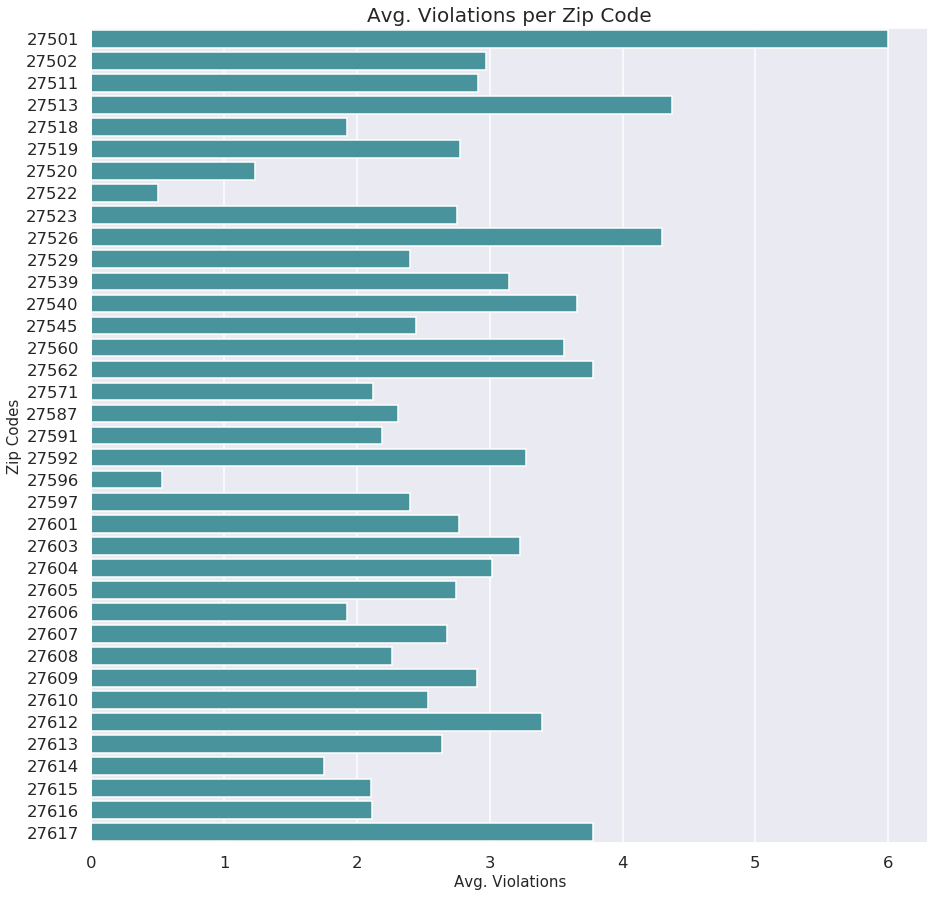

In [13]:
f, ax = plt.subplots(figsize=(15, 15))
ax = sns.barplot(x='avg_violations', y='Zip Codes', orient= 'h', color = '#3A9EAA',data = df_zip_mean)
ax.set_title('Avg. Violations per Zip Code', loc='center', size='20')
ax.set_ylabel('Zip Codes', size = 15)
ax.set_xlabel('Avg. Violations', size = 15)

We can see that this is a normal distribution, with some areas having a higher income than others which is normal. When we compare it with the graph above, it makes sense that there is a relation between lower income areas and higher violation count than other places.

Text(0.5, 0, 'Capita Income ($)')

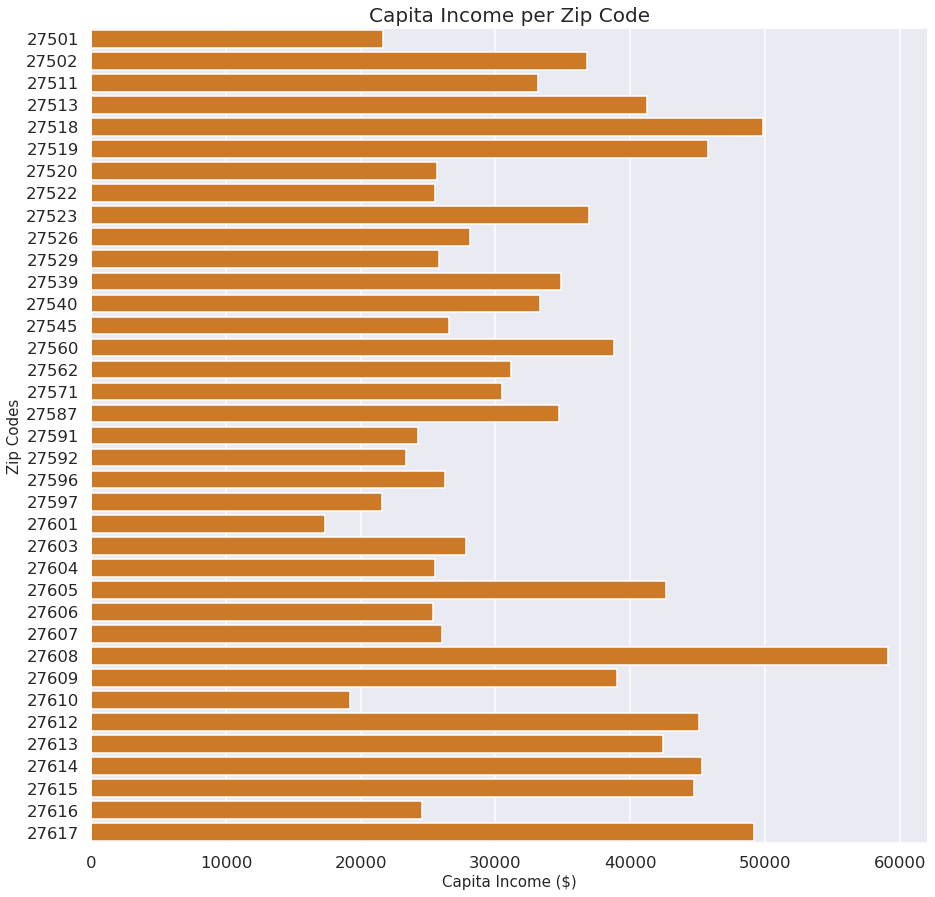

In [14]:
f, ax = plt.subplots(figsize=(15, 15))
sns.barplot(x='per_capita_income', y='Zip Codes', orient = 'h', color='#E8790C',data = df_zip_mean)
ax.set_title('Capita Income per Zip Code', loc='center', size='20')
ax.set_ylabel('Zip Codes', size = 15)
ax.set_xlabel('Capita Income ($)', size = 15)

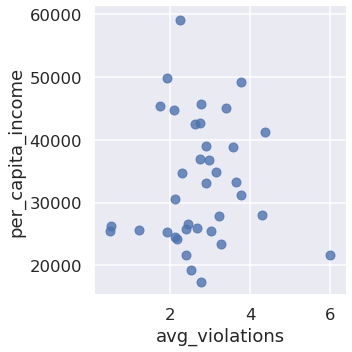

In [15]:
sns.lmplot(x='avg_violations', y='per_capita_income', 
           data=df_zip_mean, fit_reg=False);

We can see that regardless of the income, the average scores are roughly the same despite of the money difference.

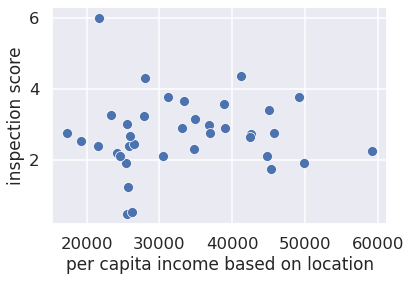

In [16]:
plt.subplot(1, 1, 1)
sns.scatterplot(x='per_capita_income', y='avg_violations', data=df_zip_mean, s=100)
plt.xlabel("per capita income based on location", fontsize=17)
plt.ylabel("inspection score", fontsize=17)

f4 = plt.gcf()

## Analysis
__Approach__: Looking at the averages between the violations and per capita income and doing a p-value test.

From this test we can see that the pvalue is 2e-31 so it's really low. That means the evvidence is in favor of our null hypothesis so we reject it.

In [17]:
stats.ttest_ind(df_zip_mean['avg_violations'], df_zip_mean['per_capita_income'])

Ttest_indResult(statistic=-20.228017802601148, pvalue=2.028012919615876e-31)

# Ethics & Privacy

For ethics, it is assumed that I have permission to use these datasets because the datasets were provided to us for this individual project. I saw that this data was also from the Wake County Data patrol and that it was publicly available because I was allowed to open up any inspection data if I wanted.

For privacy, I made sure to only use data I needed. The zip code data was the only thing that would have stood out as for a location but no one's information was there. I maintained the privacy of all the facilities being inspected. The only data I used was their num_critical which doesn't give away any information.

For bias, the data was mostly in low income areas and they were mostly restaurants in the dat which is expected. The data isn't old either and Wake County maintains their data. The inspectors seem to be giving out fair scores and giving more or less the same amount of violations in an area with the exception of some high ones at high income areas.

# Conclusion & Discussion